# Public jobs yearly salary and benefit estimator in Illinois article
#### By Terence Njekeu

#### I designed these interactive visualizations tools and made this analysis to help people who work for State public or who are interested to work in public agencies to better understand which acency or position will give them more salary and more benefits if they arelike me who has for maon motivation money.

In [40]:
import bqplot 
import matplotlib
import ipywidgets
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt

### Main Dataset
>*The dataset below presents 1016 employees and their 2015 & 2016 salary reporting and benefits in  51 departments across the city of Rockford in the state of Illinois, USA.*

In [31]:
salary_1 = pd.read_csv('2015_salary_reporting.csv',
                   na_values = {"2015 Overtime Pay": 0,
                                   '2015 Overtime Pay': 0,
                                   '2016 Grand Total Salaries & Benefits': 0, 
                                   'Health Ins':0})
salary_1.head()

Last Name First Name         Current Job Title Department Location  \
0     HAYES    PATRICK            LEGAL DIRECTOR    LEGAL DEPARTMENT   
1  BERGSTEN      DEREK                FIRE CHIEF                FIRE   
2      RYAN      JAMES        CITY ADMINISTRATOR       MAYORS OFFICE   
3    HANSON    TIMOTHY     PUBLIC WORKS DIRECTOR        PUBLIC WORKS   
4      CORL     JOSEPH  DIV CHIEF EMERGENCY OPPS                FIRE   

    2015 Pay  2015 Overtime Pay  2015 Total Pay  2016 Budgeted Salary  \
0  143661.79                NaN       143661.79             146623.78   
1  128518.56                NaN       128518.56             130478.40   
2  134286.72                NaN       134286.72             137055.36   
3  132187.20                NaN       132187.20             134912.54   
4  122552.80                NaN       122552.80             124389.41   

   Health Ins         IMRF     FICA/Med  Police Pension  Fire Pension  \
0     19110.0  18562.57055  11216.71917             0.0           0.0   
1     19812.0      0.00000      0.00000             0.0       28687.0   
2     19812.0  17351.20858  10484.73504             0.0           0.0   
3     19812.0  17079.92756  10320.80931             0.0           0.0   
4     19812.0      0.00000      0.00000             0.0       28687.0   

   Workers Comp  Unemp  Life Ins  Parking  \
0    410.546584  180.0      78.0   1308.0   
1   7685.177760  180.0      78.0      0.0   
2    383.755008  180.0      78.0    588.0   
3    377.755112  180.0      78.0      0.0   
4   7326.536249  180.0      78.0      0.0   

   2016 Grand Total Salaries & Benefits  
0                           197489.6163  
1                           186920.5778  
2                           185933.0586  
3                           182761.0320  
4                           180472.9462

### Contextual dataset
>*The contextual dataset below presents is a lager set of the main dataset because we have more employees here (about 58454) and more departement locations or Agency Division(51 in the main dataset compared to 74 in the contextual). Moreover, the contextual dataset is more general because it focuses on public jobs in the state of Illinois while the  main dataset focuses on public jobs in Rockford Illinois*

In [32]:
data = pd.read_csv('state_employee_pay.csv',
                   na_values = {"Period Pay Rate": 0,
                                   'YTD Gross': 0})                   
data.head()

_id                                        Id  \
0    1  7B37671243835EDF2C992B2B789BD72D6884A354   
1    2  83E3036CA1877343E75840D4FAF0851620AC0772   
2    3  C9145979C7A394C6CB58A5E7CC0445C9E3B7F652   
3    4  761AFAC85C27CFFB38943C3573A574960471879A   
4    5  7F5E7E1B041BD896327FE8577935B1503CF0A53F   

                           Agency      Agency Division      Employee Name  \
0  ABE LINCOLN PRES LIBRARY & MUS  ALPLM FTE EMPLOYEES   DARIAN FERNANDES   
1  ABE LINCOLN PRES LIBRARY & MUS  ALPLM FTE EMPLOYEES  AUSTIN FRIEDMEYER   
2  ABE LINCOLN PRES LIBRARY & MUS  ALPLM FTE EMPLOYEES       BRIAN DANAHA   
3  ABE LINCOLN PRES LIBRARY & MUS  ALPLM FTE EMPLOYEES       HAROLD STURM   
4  ABE LINCOLN PRES LIBRARY & MUS  ALPLM FTE EMPLOYEES       STEVE FALICA   

             Position Title  Period Pay Rate  YTD Gross  
0     ACCOUNT TECHNICIAN II           2000.0    14300.0  
1  BUILDING/GROUNDS LABORER           2300.0    21100.0  
2  BUILDING/GROUNDS LABORER           1900.0    13400.0  
3  BUILDING/GROUNDS LABORER           2000.0    13900.0  
4  BUILDING/GROUNDS LABORER           4300.0    28000.0

### Contextual Dataset 2
> The dataset below represent a work done on a similar project like mine but with FAANG (Facebook/Apple/Amazon/Netflix/Google) companies. The work was done by [Matt Grierson for his article "A Beginner’s Guide to Grabbing and Analyzing Salary Data in Python" published in Towards Data Science](https://towardsdatascience.com/a-beginners-guide-to-grabbing-and-analyzing-salary-data-in-python-e8c60eab186e)

![](https://miro.medium.com/max/700/1*EzxKW7m-O5iPLK8W1nW2Tg.png)

Matt Grierson used a json file from The [Levels.FYI website](https://www.levels.fyi/?compare=Yahoo,Carta,Google&track=Software%20Engineer) which is a open website source and pretty much has no license because they get their data from users. [Json file used ]('https://www.levels.fyi/js/salaryData.json')

## Definitions

**A `pay period` or `Period_Pay_Rate` is a time frame used to calculate earned wages and determine when employees receive their paychecks.** 
>Pay periods are fixed and most often recurring on a weekly, bi-weekly, semi-monthly or monthly basis. 
It's important to remember that the pay period is different from a workweek. Source [Oracle NetSuite](https://www.netsuite.com/portal/resource/articles/human-resources/pay-period.shtml?mc24943=v2)

**In the case of our dataset, we are looking at differemt departement and the way employees are getting pay. Some state agency pays weekly, while other pays bi-weekly, semi-monthly or monthly basis.
the salary show by our tool should be self explanatory.** 

In [33]:
df = data.drop(['_id', 'Id','Employee Name'], axis=1)

In [34]:
df.columns =[column.replace(" ", "_") for column in df.columns]

### Verification of the complenetenes of ou dataset for each feature in order to make a good analysis

<AxesSubplot:>

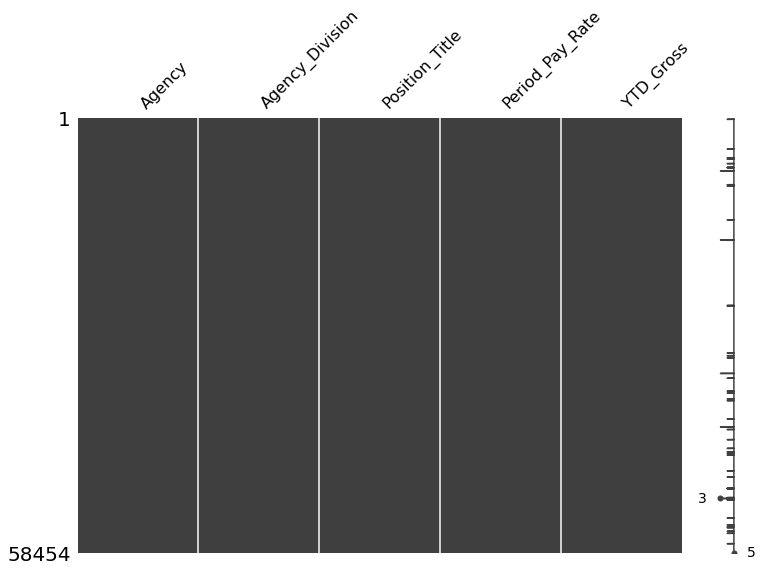

In [35]:
msno.matrix(df, figsize=(12, 8))

# Interactive plot representing different agencies in Illinois with their Period pay rate.

We can see down below from the shape of graphs that, there is a litte similarity between the `Period_Pay_Rate` and the `Year To date Gross` because the total income of a person in a year(YTD gross) depends on the indivdual paycheck the person receives. 

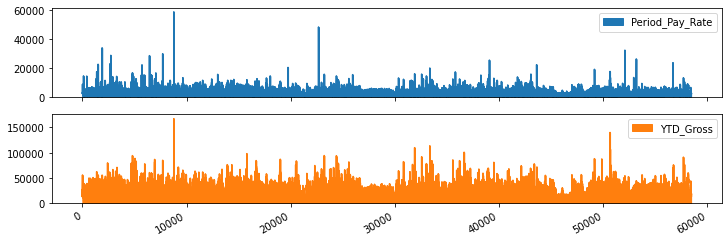

In [36]:
axs = df.plot.area(figsize=(12, 4), subplots=True)

*Visualization of each domain/agency and their period pay rate*

In [37]:
fig = px.scatter(df, x="Agency", y="Period_Pay_Rate")
fig.show()

**As you can see on the plot above the Period pay varies from one agency to another. So if salary is the most important for you make sure to use the tool above to see if you are getting paid weekly, bi-weekly...etc**

In [38]:
px.line(df, y=["Agency"])

### Let's take a closer look at how the position Title for and executive of grade I and II is related to a period pay rate in 3 Agencies(Aging, Agriculture and Public Health).


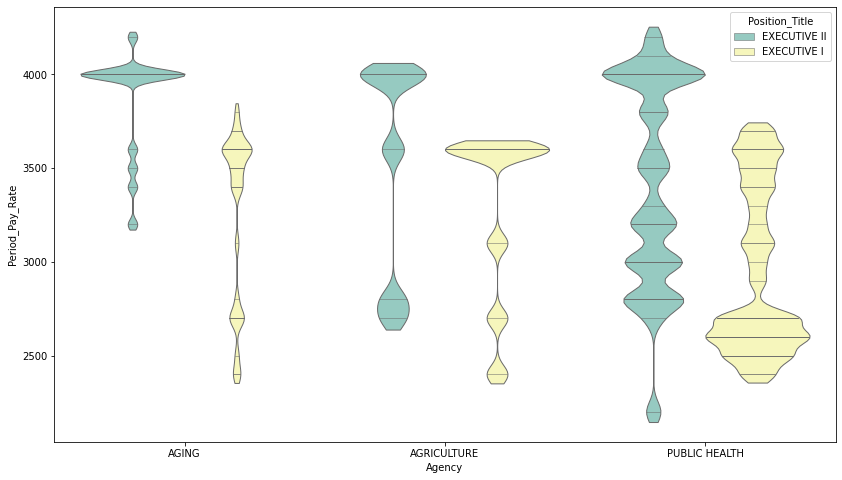

In [39]:
faang = df.query("Agency in ('AGRICULTURE','PUBLIC HEALTH','STATE EMPLOYEES','ATTORNEY GENERAL','TEACHERS','AGING') and Position_Title in ('VETERANS SERVICE OFFICER', 'CARPENTER', 'EXECUTIVE I', 'EXECUTIVE II','CHARITY BUREAU FUND') and Period_Pay_Rate")

plt.figure(figsize=(14, 8))
g = sns.violinplot(data=faang, palette="Set3", x='Agency',hue='Position_Title',y='Period_Pay_Rate',
                   inner='stick', bw=.1, cut=1, linewidth=1)

As we can see, if you are looking for an `Executive II position`, public health and aging seems to be to way to go because according to ou violin plots above you can make about 4,000 dollars/month while `Executives I` makes more in Agriculture(about 3500 dollars/month)

# Conclusion

**In sum, what motivated me to do this analisys is Money, I know this might sound akward but when I apply for jobs, the base salary is what interest me the most, I am also somehow interested by benefits. Overall, our analysis and tools allows the concerned users to better underdand the payrand and daomain thay pays the most. It is important to note that our vilon plots only shows how the period pay rate is in Aging, Agriculture and Public Health we did it that way for a more effective visualization. However, the tool can be aplied to all others domain.**